In [1]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [2]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.special

import time
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np


from qutip import *
from qutip.piqs import *

import matplotlib.animation as animation
from IPython.display import HTML
from IPython.core.display import Image, display

In [4]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros

from numba import jit

dt = 0.0002 # Time step.
T = 60 # Total time.
n = int(T / dt) # Number of time steps.

times = np.linspace(0., T, n)


J=1
N=8
    
refg     = 1
refomega = 1
refdelta=  0
refkappa= 20
refgamma= 0.0

    
Omega =refomega*J
g_coef=refg*J
Delta=refdelta*J
kappa=refkappa*J
Gamma_phi=refgamma*J
    

Gamma_du=0  #Fixed


Stochastic=1   #Is the process stochastic?
sqrt_N=np.sqrt(N)
sqrt_2phi=np.sqrt(2*Gamma_phi)

theta=np.pi  #Initial state
phi=0



#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>

from scipy import stats
mk = np.array([-1,1])


xp= (0.5*(1-np.sin(theta)*np.cos(phi)),0.5*(1+np.sin(theta)*np.cos(phi)))
yp= (0.5*(1-np.sin(theta)*np.sin(phi)),0.5*(1+np.sin(theta)*np.sin(phi)))
zp = ((np.cos(theta/2))**2, (np.sin(theta/2))**2)


#xp=(0.5,0.5)
#yp=(0.5,0.5)
#zp=(1,0)



custmx = stats.rv_discrete(name='custmx', values=(mk, xp))
custmy = stats.rv_discrete(name='custmy', values=(mk, yp))
custmz = stats.rv_discrete(name='custmz', values=(mk, zp))




@jit

def trayectory(N=N):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((3*N+2, n))
    Results[3*N][0]  =np.random.normal(0, 0.5)
    Results[3*N+1][0]=np.random.normal(0, 0.5)
    
    for j in range(N):
        
        a=custmx.rvs()
        b=custmy.rvs()
        c=custmz.rvs()
        
        Results[j][0]    =a  
        Results[j+N][0]  =b
        Results[j+2*N][0]=c
        
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        
        Results[3*N][t+1]   = Results[3*N][t]  +dt*Delta*Results[3*N+1][t]+\
            -kappa*Results[3*N][t]*dt+np.sqrt(kappa/2)* sqrtdt * Normal_VA_1
        Results[3*N+1][t+1] = Results[3*N+1][t]-dt*Delta* Results[3*N][t]+\
            -kappa*Results[3*N+1][t]*dt+np.sqrt(kappa/2)*sqrtdt * Normal_VA_2
        
        Normal_VA=random.randn()   #np.random.normal(0, 1)
        
        
        for i in range(N): 
            
            Results[i][t+1]    = Results[i][t]+dt*(-2*g_coef/sqrt_N)*Results[3*N+1][t]*Results[i+2*N][t]-\
                dt*Gamma_phi*Results[i][t]-sqrt_2phi*Results[i+N][t]* sqrtdt * Normal_VA
            
            Results[i+N][t+1]  = Results[i+N][t]+dt*(-2*g_coef/sqrt_N)*Results[3*N][t]*Results[i+2*N][t]-dt*Omega*Results[i+2*N][t]+\
                -dt*Gamma_phi*Results[i+N][t]+sqrt_2phi*Results[i][t]* sqrtdt * Normal_VA
            
            Results[i+2*N][t+1]= Results[i+2*N][t]+dt*(2*g_coef/sqrt_N)*Results[3*N][t]*Results[i+N][t]+\
                dt*(2*g_coef/sqrt_N)*Results[3*N+1][t]*Results[i][t]+dt*Omega*Results[i+N][t]
            
            Results[3*N][t+1]   += -(g_coef/(2*sqrt_N))*Results[i+N][t]*dt
            Results[3*N+1][t+1] += -(g_coef/(2*sqrt_N))*Results[i][t]*dt
            
            
    return Results


In [6]:
from numpy import mean
from numpy import linalg

from numba import jit
@jit

def summary_stat(Res,N=N,n=n):
    Results =zeros((11, n))
    count=0
    while count<n:
        a,b,c=Res[0:N, count:count+1],Res[N:2*N, count:count+1],Res[2*N:3*N, count:count+1]
        
        Results[0][count],Results[1][count],Results[2][count]=N*mean(a)/2,N*mean(b)/2,N*mean(c)/2
        Results[3][count]=0.25*(  (N*mean(a))**2- (linalg.norm(a,2))**2 )
        Results[4][count]=0.25*(  (N*mean(b))**2- (linalg.norm(b,2))**2 )
        Results[5][count]=0.25*(  (N*mean(c))**2- (linalg.norm(c,2))**2 )
        Results[6][count]=(N*mean(a)/2)**2
        Results[7][count]=(N*mean(b)/2)**2
        Results[8][count]=(N*mean(c)/2)**2
        
        alpha_x=mean(Res[3*N:3*N+1, count:count+1])
        alpha_y=mean(Res[3*N+1:3*N+2, count:count+1])
        
        alpha_cuad=alpha_x**2+alpha_y**2
        
        Results[9][count]=alpha_cuad  #np.power(alpha_x,2)+np.power(alpha_y,2)-0.5
        Results[10][count]=alpha_cuad**2-2*alpha_cuad+0.5
        
        count=count+1
        
    
    return Results
    
    

In [7]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages(itera=itera,N=N,n=n,Stochastic=Stochastic):
    Results =zeros((11, n))
    for j in range(itera):
        Trayec=trayectory(N=N)
        Results=add(Results,summary_stat(Trayec,N,n))
    
    return Results/itera
    
    
    
    

In [8]:
t0=time.time()

itera=50

Result_varDDTWA_EM=averages(itera=itera,N=N,n=n,Stochastic=1)
#Result_varDTWA=averages(itera=itera,N=N,n=n,Stochastic=0)

t1=time.time()

print(t1-t0)



<ipython-input-7-0ce4085d1001>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages" failed type inference due to: Invalid use of type(CPUDispatcher(<function trayectory at 0x000001687BEB5EE0>)) with parameters (N=int64)

During: resolving callee type: type(CPUDispatcher(<function trayectory at 0x000001687BEB5EE0>))
During: typing of call at <ipython-input-7-0ce4085d1001> (12)


File "<ipython-input-7-0ce4085d1001>", line 12:
def averages(itera=itera,N=N,n=n,Stochastic=Stochastic):
    <source elided>
    for j in range(itera):
        Trayec=trayectory(N=N)
        ^

  @jit
<ipython-input-7-0ce4085d1001>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-7-0ce4085d1001>", line 11:
def averages(itera=itera,N=N,n=n,Stochastic=Stochastic):

71.07980060577393


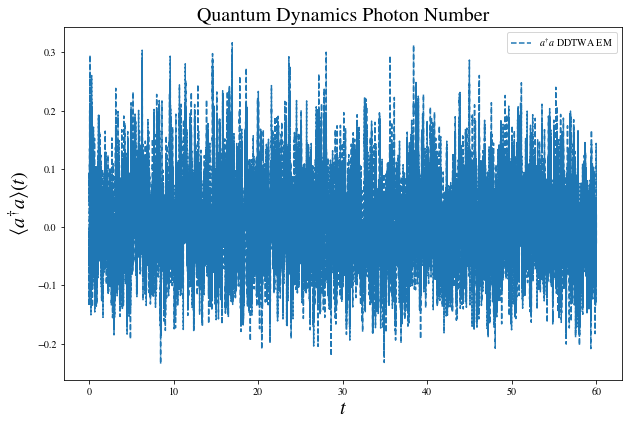

In [9]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
#plt.plot(t, nphot_t, 'k-', label='Time evolution')
plt.title(r'Quantum Dynamics Photon Number', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a^{\dagger}a \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[9]-0.5,"--",label="$a^{\dagger}a$ DDTWA EM")




#plt.legend(fontsize = label_size)
plt.legend()
plt.show()
plt.close()

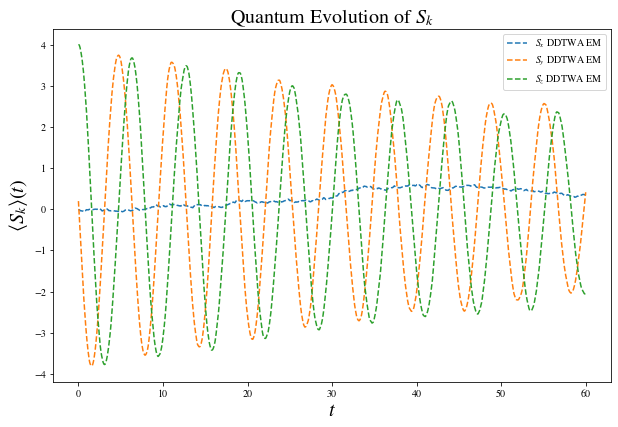

In [10]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.title(r'Quantum Evolution of $S_k$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[0],"--",label="$S_x$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[1],"--",label="$S_y$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[2],"--",label="$S_z$ DDTWA EM")




#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

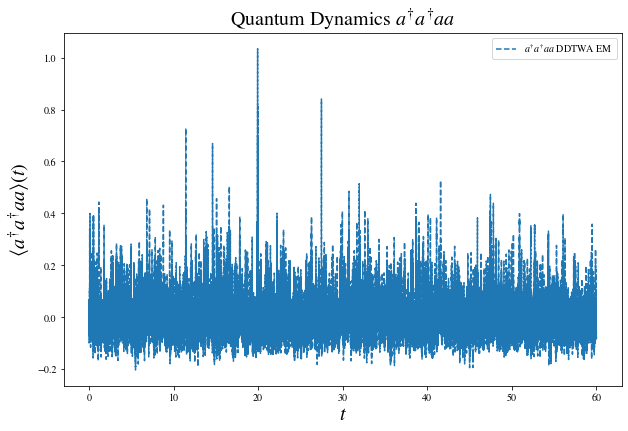

In [11]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
#plt.plot(t, nphot_t, 'k-', label='Time evolution')
plt.title(r'Quantum Dynamics $a^{\dagger}a^{\dagger}aa$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a^{\dagger}a^{\dagger} aa \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[10],"--",label="$a^{\dagger}a^{\dagger}aa$ DDTWA EM")




#plt.legend(fontsize = label_size)
plt.legend()
plt.show()
plt.close()

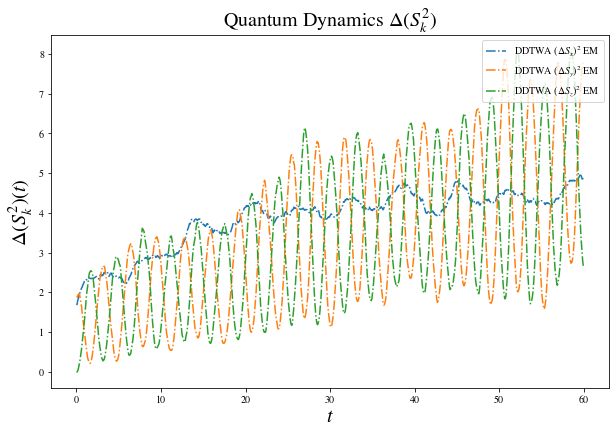

In [12]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
#plt.plot(t, nphot_t, 'k-', label='Time evolution')
plt.title(r'Quantum Dynamics $\Delta (S_k^2)$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\Delta (S_k^2) (t)$', fontsize = label_size)


axEM=N/4+  Result_varDDTWA_EM[3+0]-(Result_varDDTWA_EM[0])**2
ayEM=N/4+  Result_varDDTWA_EM[3+1]-(Result_varDDTWA_EM[1])**2
azEM=N/4+  Result_varDDTWA_EM[3+2]-(Result_varDDTWA_EM[2])**2


ax1EM=np.array(Result_varDDTWA_EM[6+0])-np.array((Result_varDDTWA_EM[0])**2)
ay1EM=np.array(Result_varDDTWA_EM[6+1])-np.array((Result_varDDTWA_EM[1])**2)
az1EM=np.array(Result_varDDTWA_EM[6+2])-np.array((Result_varDDTWA_EM[2])**2)


plt.plot(times,axEM,"-.",label="DDTWA $(\Delta S_x)^2 $ EM")
plt.plot(times,ayEM,"-.",label="DDTWA $(\Delta S_y)^2 $ EM")
plt.plot(times,azEM,"-.",label="DDTWA $(\Delta S_z)^2 $ EM")


plt.legend()




plt.legend(loc="upper right")

## PIQS

In [13]:
# TLS parameters
n_tls = N
system = Dicke(N = n_tls)
[jx, jy, jz] = jspin(N)
jp = jspin(N,"+")
jm = jp.dag()

system.hamiltonian = Omega * jx
system.collective_dephasing = 2*Gamma_phi
D_tls = system.liouvillian() 



# Light-matter coupling parameters

kappa_eff=2*kappa


nphot = int(2*N+2)  #modes of light
a = destroy(nphot)
h_int = (g_coef/np.sqrt(N)) *(tensor(a, jp)+tensor(a.dag(), jm))



# Photonic Liouvillian
c_ops_phot = [np.sqrt(kappa_eff) * a]

D_phot = liouvillian(Delta * a.dag()*a , c_ops_phot)

# Identity super-operators
nds = num_dicke_states(n_tls)
id_tls = to_super(qeye(nds))
id_phot = to_super(qeye(nphot))

# Define the total Liouvillian
D_int = -1j* spre(h_int) + 1j* spost(h_int)
D_tot = D_int + super_tensor(D_phot, id_tls) + super_tensor(id_phot, D_tls)

# Define operator in the total space
nphot_tot = tensor(a.dag()*a, qeye(nds))
adag_cuad_a_cuad = tensor(a.dag()*a.dag()*a*a, qeye(nds))

jx_tot=tensor(qeye(nphot), jx)
jy_tot=tensor(qeye(nphot), jy)
jz_tot=tensor(qeye(nphot), jz)

jxcuad_tot=tensor(qeye(nphot), jx*jx)
jycuad_tot=tensor(qeye(nphot), jy*jy)
jzcuad_tot=tensor(qeye(nphot), jz*jz)


In [14]:
excited_state = excited(N)
ground_state = dicke(N, N/2, -N/2)

ground_phot = ket2dm(basis(nphot,0))  #vacuum
#rho0 = tensor(ground_phot, excited_state)
#rho0 = tensor(ground_phot, ground_state)



import scipy.special

rho_init=np.array(ground_state)


for n in range(N+1):
    for npr in range(N+1):
        sq_bin=np.sqrt(scipy.special.binom(N,n)*scipy.special.binom(N,npr))
        p_cos=np.power(np.cos(theta/2),n+npr)
        p_sin=np.power(np.sin(theta/2),2*N-n-npr)
        p_phi=np.exp(1j*phi*(npr-n))
        rho_init[n][npr]=sq_bin*p_cos*p_sin*p_phi

rho0=   tensor(ground_phot, Qobj(rho_init))     

In [ ]:
t = np.linspace(0, T, 1000)
result1 = mesolve(D_tot, rho0, t, [], e_ops = [nphot_tot,jx_tot,jy_tot,jz_tot,adag_cuad_a_cuad,jxcuad_tot,jycuad_tot,jzcuad_tot], 
                  options = Options(store_states=True))    #[nphot_tot,jx,jy,jz]
rhot_tot = result1.states
nphot_t = result1.expect[0]
jx_t = result1.expect[1]
jy_t = result1.expect[2]
jz_t = result1.expect[3]
adag_cuad_a_cuad_t=result1.expect[4]
jxx_t=result1.expect[5]
jyy_t=result1.expect[6]
jzz_t=result1.expect[7]

In [ ]:
j_max = N/2.
label_size = 20


fig3 = plt.figure(3)

plt.plot(t, jx_t, 'k-', label='$S_X$ PIQS')
plt.plot(t, jy_t, 'r-', label='$S_y$ PIQS')
plt.plot(t, jz_t, 'g-', label='$S_z$ PIQS')

plt.title(r'Quantum Evolution of $S_k$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[0],"--",label="$S_x$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[1],"--",label="$S_y$ DDTWA EM")

plt.plot(times, Result_varDDTWA_EM[2],"--",label="$S_z$ DDTWA EM")




#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

In [ ]:
j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
plt.plot(t, nphot_t, 'k-', label='$a^{\dagger}a$ PIQS')
plt.title(r'Quantum Dynamics Photon Number', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a^{\dagger}a \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[9]-0.5,"--",label="$a^{\dagger}a$ DDTWA EM")




#plt.legend(fontsize = label_size)
plt.legend()
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
#plt.plot(t, nphot_t, 'k-', label='Time evolution')
plt.title(r'Quantum Dynamics $a^{\dagger}a^{\dagger}aa$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle a^{\dagger}a^{\dagger} aa \rangle(t)$', fontsize = label_size)


plt.plot(times, Result_varDDTWA_EM[10],"--",label="$a^{\dagger}a^{\dagger}aa$ DDTWA EM")


plt.plot(t, adag_cuad_a_cuad_t, 'k-', label='$a^{\dagger}a^{\dagger}aa$ PIQS')

#plt.legend(fontsize = label_size)
plt.legend()
plt.show()
plt.close()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.5)

j_max = N/2.
label_size = 20


fig3 = plt.figure(3)
#plt.plot(t, nphot_t, 'k-', label='Time evolution')
plt.title(r'Quantum Dynamics of $g^{(2)}(0)$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$g^{(2)}(0)$', fontsize = label_size)




g2_0=np.divide(adag_cuad_a_cuad_t,nphot_t**2)
g2_est=np.divide(Result_varDDTWA_EM[10],(Result_varDDTWA_EM[9]-0.5)**2)

index=3500
index1=175

plt.plot(t[index1:],g2_0[index1:])
plt.plot(times[index:],g2_est[index:])

#plt.legend(fontsize = label_size)
plt.legend()
plt.show()
plt.close()


In [ ]:
j_max = N/2.
label_size = 20


fig3 = plt.figure(3)

plt.plot(t, jxx_t-(jx_t)**2, 'k-', label='$\Delta(S_x^2)$ PIQS')
plt.plot(t, jyy_t-(jy_t)**2, 'r-', label='$\Delta(S_y^2)$ PIQS')
plt.plot(t, jzz_t-(jz_t)**2, 'g-', label='$\Delta(S_z^2)$ PIQS')

plt.title(r'Quantum Evolution of $\Delta(S_k^2)$', fontsize = label_size)
plt.xlabel(r'$t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle \Delta(S_k^2) \rangle(t)$', fontsize = label_size)



plt.plot(times,axEM,"-.",label="DDTWA $(\Delta S_x)^2 $ EM")
plt.plot(times,ayEM,"-.",label="DDTWA $(\Delta S_y)^2 $ EM")
plt.plot(times,azEM,"-.",label="DDTWA $(\Delta S_z)^2 $ EM")




#plt.legend(fontsize = label_size)
plt.legend(loc="upper right")
plt.show()
plt.close()

## TWA 

In [ ]:
n = int(T / dt) # Number of time steps.

times = np.linspace(0., T, n)

matrix_array=[]

# X matrix


fx=np.zeros((2, 2),dtype=np.complex_)
fx[0][1]=1
fx=fx+np.transpose(fx)
matrix_array.append(fx)

#Y Matrix

fy=np.zeros((2, 2),dtype=np.complex_)
fy[0][1]=-1j
fy=fy+np.conjugate(np.transpose(fy))
matrix_array.append(fy)

#Z matrix

fz=np.zeros((2, 2),dtype=np.complex_)
fz[0][0]=1
fz[1][1]=-1
matrix_array.append(fz)




#set the initial values due to the measurements in the state |\psi>=cos(\theta/2)|0>+sin(\theta/2)|1>


Theta = theta
Phi   = phi

#-----------------------------------------------------------------------------------------------------

Psi_0=np.zeros((2,1),dtype=np.complex_)
Psi_0[0][0]=np.cos(Theta/2)
Psi_0[1][0]=np.sin(Theta/2)*np.exp(1j*Phi)


Psi_0_adj=np.transpose(np.conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(np.matmul(Psi_0_adj,np.matmul(j,Psi_0))[0][0])

    

Cov_mat=np.zeros((3, 3),dtype=np.complex_)

for i in range(3):
    for j in range(3):
        Cov_mat[i][j]=0.5*(np.matmul(Psi_0_adj,np.matmul( np.matmul(matrix_array[i],matrix_array[j])+np.matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        
        
Cov_mat=N*Cov_mat   

In [ ]:
Cov_mat

In [ ]:
Cov_mat_list=[]

for j in range(3):
    Cov_mat_list.append(list(np.real(Cov_mat[j])))    
    

from scipy import stats



@jit

def trayectory_col(N=N):
    sqrtdt = np.sqrt(dt)*Stochastic
    
    Results =zeros((5, n))
    Results[3][0]  =np.random.normal(0, 0.5)
    Results[4][0]=np.random.normal(0, 0.5)
    
    rand=np.random.multivariate_normal(N*np.real(Miu), Cov_mat_list, 1).T 

        
    Results[0][0]    =rand[0][0]  
    Results[1][0]  =rand[1][0]
    Results[2][0]=rand[2][0]
        
       
        
    
    for t in range(n-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        
        Results[3][t+1]   = Results[3][t]  +dt*Delta*Results[4][t]+\
            -kappa*Results[3][t]*dt+np.sqrt(kappa/2)* sqrtdt * Normal_VA_1
        Results[4][t+1] = Results[4][t]-dt*Delta* Results[3][t]+\
            -kappa*Results[4][t]*dt+np.sqrt(kappa/2)*sqrtdt * Normal_VA_2
        
        Normal_VA=random.randn()   #np.random.normal(0, 1)

            
        Results[0][t+1]    = Results[0][t]+dt*(-2*g_coef/sqrt_N)*Results[4][t]*Results[2][t]-\
                dt*Gamma_phi*Results[0][t]-sqrt_2phi*Results[1][t]* sqrtdt * Normal_VA
            
        Results[1][t+1]  = Results[1][t]+dt*(-2*g_coef/sqrt_N)*Results[3][t]*Results[2][t]-dt*Omega*Results[2][t]+\
                -dt*Gamma_phi*Results[1][t]+sqrt_2phi*Results[1][t]* sqrtdt * Normal_VA
            
        Results[2][t+1]= Results[2][t]+dt*(2*g_coef/sqrt_N)*Results[3][t]*Results[1][t]+\
                dt*(2*g_coef/sqrt_N)*Results[4][t]*Results[0][t]+dt*Omega*Results[1][t]
            
        Results[3][t+1]   += -(g_coef/(2*sqrt_N))*Results[1][t]*dt
        Results[4][t+1] += -(g_coef/(2*sqrt_N))*Results[0][t]*dt
            
    return Results


In [ ]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_col(itera=itera,N=N,n=n):
    Results =zeros((5, n))
    for j in range(itera):
        Trayec=trayectory_col(N)
        Results=add(Results,Trayec)
    
    return Results/itera

In [ ]:
t0=time.time()

itera=2000

Result_varDDTWA_Col = averages_col(itera=itera,N=N,n=n)



t1=time.time()

print(t1-t0)

In [ ]:
plt.title("Quantum Dynamics for $<S_k>$ in a 2-level-system")


plt.plot(times, Result_varDDTWA_Col[2]/2,label="$S_z$ DissTWA")
plt.plot(times, Result_varDDTWA_Col[0]/2,label="$S_x$ DissTWA")
plt.plot(times, Result_varDDTWA_Col[1]/2,label="$S_y$ DissTWA")


plt.plot(times, -2*Result_varDDTWA_EM[2]/2,label="$S_z$ DDTWA")
plt.plot(times, 2*Result_varDDTWA_EM[0]/2,label="$S_x$ DDTWA")
plt.plot(times, -2*Result_varDDTWA_EM[1]/2,label="$S_y$ DDTWA")


plt.legend()

In [ ]:
plt.imshow(Cov_mat/N)
plt.colorbar()
plt.show()
